In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wrangle import wrangle, wrangle_explore

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")
import warnings
warnings.filterwarnings("ignore")

# Project Planning

### Project and Goals

    The goal of this project is to find drivers of coffee who have been graded 84 or higher.

### Domain Knowledge Tip
    65 – 80 = Commodity Coffee The type used to make supermarket coffee, blends and instant.

    80+ = Specialty Coffee The flavours are more subtle, the cup more balanced. At higher end coffee shops, they only buy coffees of 84 or higher

    90+ = Presidential Award These prestigious coffees make up less than 1% of the specialty coffee market, they’re just that rare. And that good.

# Executive Summary - Conclusions & Next Steps

### Conclusion
    - 


### Recommendations


# Prepare

#### Dropped Columns

These columns got dropped because they didn't offer any value
- Unnamed: 0
- Owner
- Farm.Name
- Company
- Expiration
- Lot.Number
- Mill
- Producer
- Certification.Address
- Certification.Contact
- ICO.Number
- Certification.Body
- In.Country.Partner
- Owner.1
- Species
- Altitude
- unit_of_measurement
- altitude_low_meters'
- altitude_high_meters

#### Handle Nulls

Dropped any row that was missing a value from the following columns:
- Altitude
- Region
- Quakers
- Harvest.Year
- Variety

Used the median value to fill in missing values from the following columns:
- Color
- Processing.Method

#### Convert Data Types

Changed the following columns data types:
- Bag.Weight -> float
- Grading.Date -> datetime
- Harvest.Year -> int

#### Miscellaneous

- In Color I Converted any Bluish-Green value to Blue-Green
- In Bag.Weight converted lbs into kg
- Seperated Grading.Date into three new columns grading_month, grading_year, grading_day

#### Rename

Changed the following columns names to something more conventional:
- Country.of.Origin -> country
- Region' -> region
- Number.of.Bags -> number_of_bags
- Harvest.Year -> harvest_year
- Grading.Date -> grading_date
- Variety -> variety
- Processing.Method -> processing_method
- Aroma -> aroma
- Flavor -> flavor
- Aftertaste -> aftertaste
- Acidity -> acidity
- Body -> body
- Balance -> balance
- Uniformity -> uniformity
- Clean.Cup -> clean_cup
- Sweetness -> sweetness
- Cupper.Points -> cupper_points
- Total.Cup.Points -> total_cup_points
- Moisture -> moisture
- Category.One.Defects -> category_one_defects
- Quakers -> quakers
- Color -> color
- Category.Two.Defects -> category_two_defects

#### Engineered columns

- grading_month = from Grading.Date
- grading_year = from Grading.Date
- grading_day = from Grading.Date
- excellent_rating = from total_cup_points >= 84
- total_bag_weight = number_of_bags * bag_weight

#### Removed Outliers
    Coming Soon
#### Scaling
    Coming Soon
#### Encode
- Created dummy columns for - variety, processing_method, color


# Exploration

In [2]:
train, validate, test = wrangle_explore()

### Orginally hypothesis

    -The altitude_mean_meters and the processing_method are the two most important drivers for coffee rating of 84 or higher

# Question # 1

    Is the average elevation for a coffee rated 84 or higher different than coffee whos rating is less than 84?

### Setting up seperate dataframes

In [3]:
# coffee with excellent rating into df_rating
df_rating = train[train['excellent_rating'] == 1]


# coffee with without excellent rating into df_without
df_without = train[train['excellent_rating'] != 1]

In [4]:
# checking number of values in each
len(df_rating), len(df_without)

(74, 395)

### Checking Mean

In [5]:
# with excellent rating altitude mean
df_rating.altitude_mean_meters.mean()

1523.3793729729728

In [6]:
# witout excellent rating altitude mean
df_without.altitude_mean_meters.mean()

1274.6375777215198

### Checking Median

In [7]:
# with excellent rating altitude median
df_rating.altitude_mean_meters.median()

1500.0

In [8]:
# witout excellent rating altitude median
df_without.altitude_mean_meters.median()

1310.64

### Graph

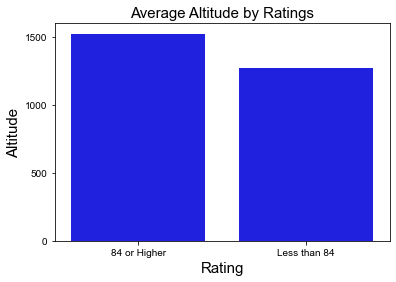

In [9]:
rating = ['84 or Higher', 'Less than 84']
rating_mean = [df_rating.altitude_mean_meters.mean(), df_without.altitude_mean_meters.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('Rating',fontsize = 15, )
ax.set_ylabel('Altitude',fontsize = 15)
ax.set_title('Average Altitude by Ratings', fontsize = 15)
sns.set(font_scale = 2)
ax.set(xlabel='Rating', ylabel='Altitude')
plt.show()

### Question 1 At A Glance

    - 84 or higher rated coffee did have a higher altitude_mean_meters mean & median than coffee whos rating was less than 84.  
    - The mean and median were not too far off from one another for both rated and without

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [10]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    Yes, I seperated excellent rated from non excellent rated

### Normally Distributed?
    - 84 or higher rated coffee is kind of normally distributed
    - Less than 84 rated coffee is normally distributed

<AxesSubplot:>

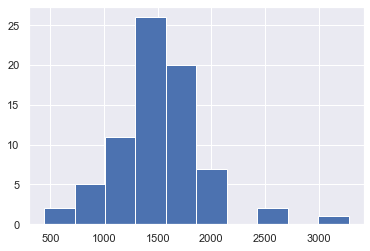

In [11]:
sns.set(font_scale = 1)
df_rating.altitude_mean_meters.hist()

<AxesSubplot:>

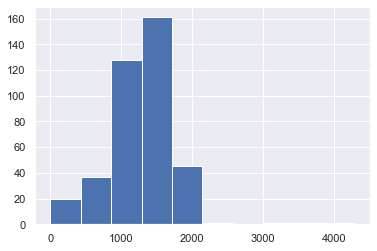

In [12]:
df_without.altitude_mean_meters.hist()

### Equal Variances?
    - The leven test concluded the populations did not have equal variances.

In [13]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stats, p

(0.44033741774588486, 0.507287083624284)

In [14]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do have equal variances


### Mann-Whitney's Test
    Assumptions were not met.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: There is no difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.
### $H_a$: There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee.

In [15]:
stat, p = mannwhitneyu(df_rating.altitude_mean_meters, df_without.altitude_mean_meters)
stat, p

(10002.0, 8.054287930351236e-06)

In [16]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject Null Hypothesis


### Hypotheis Results
    - There is a difference in altitude_mean_meters in 84 or higher rated coffee from less than 84 rated coffee

### Question 1 Takeway
    - I have a 95% confidence level that there is a difference in altitude between 84 or higher rated and less than 84 rated coffee.  
    - 84 or higher rated coffee has a higher mean/median altitude than less than 84 rated coffee
    - altitude_mean_meters seems to be a good fit or useful for modeling.  I will include it in my models and see if this is true. 

# Question 2

    Is the average bag_weight for a coffee rated 84 or higher different than the weight of all coffee?

### Setting up seperate dataframes

In [17]:
# df_rating is equal to a coffee rating 84 or higher
df_rating = train[train['excellent_rating'] == 1]

In [18]:
# checking number of values in each
len(df_rating), len(train)

(74, 469)

### Checking Mean

In [19]:
# bag_weight mean for coffee rated 84 or higher 
df_rating.bag_weight.mean()

40.986486486486484

In [20]:
# Entire population bag_weight mean
train.bag_weight.mean()

33.850746268656714

### Graph

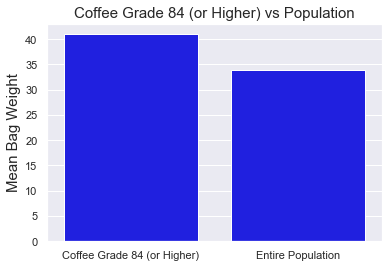

In [21]:
# Mean
rating = ['Coffee Grade 84 (or Higher)', 'Entire Population']
rating_mean = [df_rating.bag_weight.mean(), train.bag_weight.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('',fontsize = 15, )
ax.set_ylabel('Bag Weight',fontsize = 15)
ax.set_title('Coffee Grade 84 (or Higher) vs Population', fontsize = 15)
sns.set(font_scale = 1)
ax.set(xlabel='', ylabel='Mean Bag Weight')
plt.show()

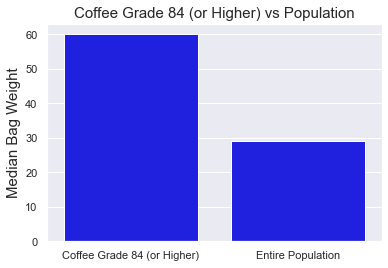

In [22]:
# Mean
rating = ['Coffee Grade 84 (or Higher)', 'Entire Population']
rating_mean = [df_rating.bag_weight.median(), train.bag_weight.median()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('',fontsize = 15, )
ax.set_ylabel('Bag Weight',fontsize = 15)
ax.set_title('Coffee Grade 84 (or Higher) vs Population', fontsize = 15)
sns.set(font_scale = 1)
ax.set(xlabel='', ylabel='Median Bag Weight')
plt.show()

### Question 2 At A Glance

    - 84 or higher rated coffee did have a higher bag_weight mean than the entire population of coffee.  
    - The mean were not too far off from one another

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [23]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    No not independent because the entire population includes 84 or higher graded coffee

### Normally Distributed?
    - 84 or higher rated bag weight is not normally distributed
    - Entire population is not normally distributed

<AxesSubplot:>

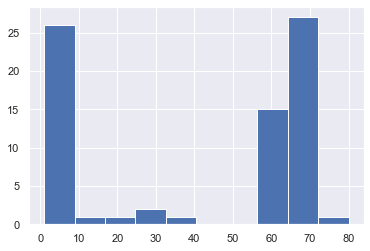

In [24]:
sns.set(font_scale = 1)
df_rating.bag_weight.hist()

<AxesSubplot:>

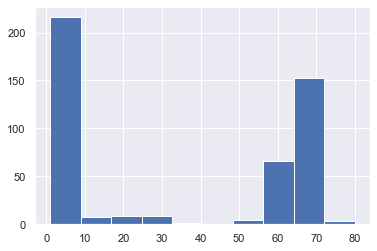

In [25]:
train.bag_weight.hist()

### Equal Variances?
    - The leven test concluded the populations did not have equal variances.

In [26]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.bag_weight, train.bag_weight)
stats, p

(10.16763616986114, 0.0015119628803599763)

In [27]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do not have equal variances


###  Wilcoxon
    Assumptions were not met.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: The average bag_weight of 84 or higher rated coffee is not different than the average of the entire population.
### $H_a$: The average bag_weight of 84 or higher rated coffee is different than the average of the entire population.

### Hypothesised Median

In [28]:
hypo_med = df_rating.bag_weight.median()
hypo_med

60.0

In [29]:
z, p = wilcoxon(train.bag_weight - hypo_med)
z, p

(12694.0, 4.0608607540315044e-34)

In [30]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject Null Hypothesis


### Hypotheis Results
    - The average bag_weight of 84 or higher rated coffee is different than the average of the entire population.

### Question 2 Takeway
    - I have a 95% confidence level that there is a difference in bag_weight between 84 or higher rated and the entire population of coffee.
    - However thee means were not too far off from one another

# Question 3

    - Which processing_method has a higher percentage of 84 or higher rated coffee?

In [31]:
train.processing_method.value_counts()

Washed / Wet                 368
Natural / Dry                 81
Semi-washed / Semi-pulped     20
Name: processing_method, dtype: int64

In [32]:
df_plus = train[train.excellent_rating == 1]

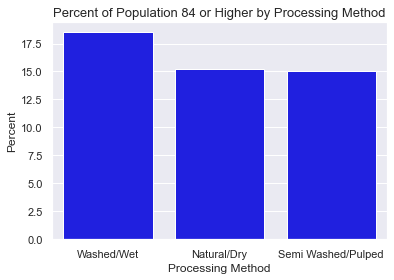

In [33]:
# Creating a series with percentages of processing method 84 or higher rated coffee by population
s = ((df_rating.processing_method.value_counts()/train.processing_method.value_counts())*100).sort_values(ascending = False)

# Graphing The Series
index_ = list(s.index)
index_[0] = 'Washed/Wet'
index_[1] =  'Natural/Dry'
index_[2] = 'Semi Washed/Pulped'
s.index = index_
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84 or Higher by Processing Method', fontsize = 13)
sns.set(font_scale = 1.1)
ax.set(xlabel='Processing Method', ylabel='Percent')
plt.show()

### Question 3 Takeway
    - Washed/Wet had more 84 or higher rated coffee but not by much
    - I was hoping to see a bigger trend in 84 or higher rated coffee
    - The three processing process are fairly close.
    - I will added them to my model to see if they provide value and document the resutls

# Question 4

    - Which variety has a higher percentage of 84 or higher rated coffee?

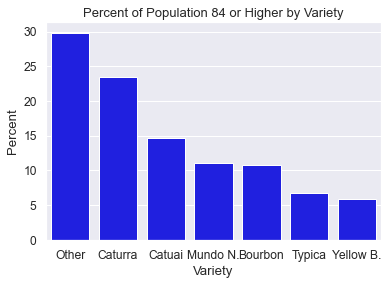

In [34]:
s = ((df_rating.variety.value_counts()/train.variety.value_counts())*100).sort_values(ascending = False)
index_ = list(s.index)
index_[3] = 'Mundo N.'
index_[6] = 'Yellow B.'
s.index = index_

ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84 or Higher by Variety', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Variety', ylabel='Percent')
plt.show()

### Question 4 Takeway
    - 'Other' had more 84 or higher rated coffee than any other variety
    - There was a lot of variance in the variety percentage 84 or higher by total population
    - 'variety' seems like a good feature to use in modeling.  I will use it and document the results

# Question 5

    - Which harvest year had a higher percentage of 84 or higher rated coffee?

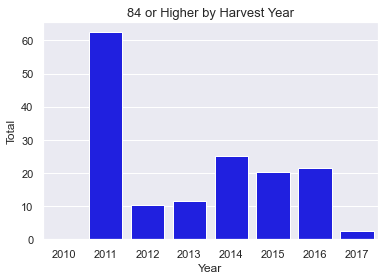

In [35]:
# Creating a series with percentages of harvest year 84 or higher rated coffee by population
s = ((df_rating.harvest_year.value_counts(ascending=True)/train.harvest_year.value_counts(ascending=True))*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Harvest Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

### Question 5 Takeway

    - There were only a few values for the year 2010 & 2011. Although those years seem like they did well, they are really outliers.
    - Also keep in mind I filled in missing values for harvest year as the median so this feature might not be the best for modeling.
    - If time allows I will try and see how it does in my model, as it is, and document the results.
    - If time allows I will also remove outliers to see if its boosts model performance and document the results.

# Question 6

    - Which grading year had a higher percentage of 84 or higher rated coffee?

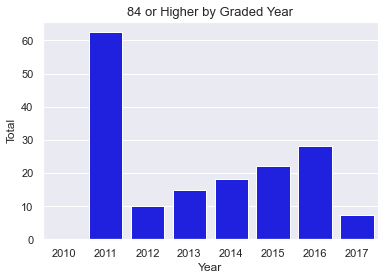

In [36]:
# Creating a series with percentages of graded year 84 or higher rated coffee by population
s = (df_rating.grading_year.value_counts()/train.grading_year.value_counts()*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Graded Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

### Question 6 Takeway
    - The grading year of 2011 was the greatest year for 84 or higher rated coffee.
    - This feature was more dependable than harvest year because zero values were missing
    - This features seems useful to try and use in my model
    - I will add it and document the results

# Question 7

    - Which grading month had a higher percentage of 84 or higher rated coffee?

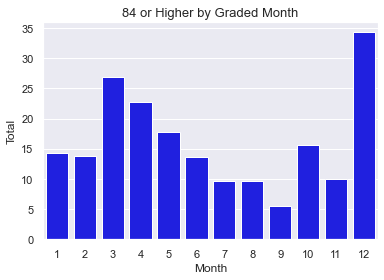

In [37]:
# Creating a series with percentages of graded year 84 or higher rated coffee by population
s = (df_rating.grading_month.value_counts()/train.grading_month.value_counts()*100).sort_values()

# Graphing the series
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Graded Month', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Month', ylabel='Total')
plt.show()

### Question 7 Takeway
    - The "grading_month" of Decemeber was the greatest month for 84 or higher rated coffee.
    - This features seems useful to try and use in my model
    - I will add it and document the results

# Exploration Take Away

### Features I am predicting to do reasonably well in my model.  
    'altitude'
    'bag_weight'
    'processing_method'
    'variety'
    'harvest_year'
    'graded_year'
    'graded_month'


# Modeling

In [44]:
train, validate, test = wrangle()

### Threshold allocation

In [45]:
threshold = .05

# Baseline

In [46]:
# Which Value is common fr
train.excellent_rating.value_counts()

0    395
1     74
Name: excellent_rating, dtype: int64

In [47]:
baseline_accuracy = (train.excellent_rating == 0).mean()
print(f"Baseline Accuracy is: {round(baseline_accuracy, 3)*100}%")

Baseline Accuracy is: 84.2%


# Decision Tree Classifier

## Removing any feature directly involved in the scoring of each coffee

In [48]:
features = list(train.columns)

# Removing target
features.remove('excellent_rating')

# Removing any feature directly involved in the scoring of each coffee
features.remove('aroma_scaled')
features.remove('flavor_scaled')
features.remove('aftertaste_scaled')
features.remove('acidity_scaled')
features.remove('body_scaled')
features.remove('balance_scaled')
features.remove('uniformity_scaled')
features.remove('clean_cup_scaled')
features.remove('sweetness_scaled')
features.remove('cupper_points_scaled')
features.remove('moisture_scaled')
features.remove('category_one_defects_scaled')
features.remove('quakers_scaled')
features.remove('category_two_defects_scaled')

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [49]:
# Make the model
clf = DecisionTreeClassifier(max_depth=2, random_state=123)

# Fit the model
clf = clf.fit(X_train, y_train)

# Train
y_pred = clf.predict(X_train)
train_accuracy = clf.score(X_train, y_train)

# Validate

y_pred = clf.predict(X_validate)
validate_accuracy = clf.score(X_validate, y_validate)


print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(clf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of Decision Tree classifier on training set: 0.855
Accuracy of Decision Tree classifier on validate set: 0.841
Passes Treshold Allocation: True


### Decision Tree with all features minus scoring takeaways
    - Altitude was top feature
    - Did not beat baseline
    - Best Depth 2 @ .841 accuracy on validate

# KNN

In [50]:
features = ['variety_Bourbon_scaled',
    'variety_Catuai_scaled',
    'variety_Caturra_scaled',
    'variety_Mundo Novo_scaled',
    'variety_Other_scaled',
    'variety_Typica_scaled',
    'variety_Yellow Bourbon_scaled',
    'processing_method_Natural / Dry_scaled',
    'processing_method_Semi-washed / Semi-pulped_scaled',
    'processing_method_Washed / Wet_scaled',
    'altitude_mean_meters_scaled',
    'grading_month_scaled',
    'grading_year_scaled',
    'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [67]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Train
y_pred = knn.predict(X_train)
train_accuracy = knn.score(X_train, y_train)

# Validate
y_pred = knn.predict(X_validate)
validate_accuracy = knn.score(X_validate, y_validate)

print('Accuracy of K Neighbors classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K Neighbors classifier on validate set: {:.3f}'
      .format(knn.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of K Neighbors classifier on training set: 0.84
Accuracy of K Neighbors classifier on validate set: 0.841
Passes Treshold Allocation: True


### KNN with all features from exploration
    - Did not beat baseline
    - Best Model at n_neighbors = 9 @ .841 accuracy on validate

# Random Forest Classifier

In [69]:
features = ['altitude_mean_meters_scaled',
            'grading_month_scaled',
            'number_of_bags_scaled',
            'harvest_year_scaled',
            'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [70]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of random forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of random forest classifier on training set: 0.87
Accuracy of random forest classifier on validate set: 0.861
Passes Treshold Allocation: True


### Random Forest Classifier Takeaway
    - Best Validate Model at .861 accuracy on validate
    - Hyperparameters used leaf=2, depth =5

# Best Model
    - Random Forest Classifier Takeaway
    - Best Validate Model at .861 accuracy on validate
    - Hyperparameters used leaf=2, depth =5
    - Features used
        - 'altitude_mean_meters_scaled',
        - 'grading_month_scaled',
        - 'number_of_bags_scaled',
        - 'harvest_year_scaled'
        - 'bag_weight_scaled'

# Running Test

In [40]:
features = ['altitude_mean_meters_scaled',
            'grading_month_scaled',
            'number_of_bags_scaled',
            'harvest_year_scaled',
            'bag_weight_scaled']

# Setting up X_train
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

# Setting up y_train
y_train = train['excellent_rating']
y_validate = validate['excellent_rating']
y_test = test['excellent_rating']

In [41]:
# Make the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

# Fit the model
rf.fit(X_train, y_train)

# Train
y_pred = rf.predict(X_train)
train_accuracy = rf.score(X_train, y_train)

# Validate
y_pred = rf.predict(X_validate)
validate_accuracy = rf.score(X_validate, y_validate)

# Test
y_pred = rf.predict(X_test)
test_accuracy = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.3f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on validate set: {:.3f}'
      .format(rf.score(X_validate, y_validate)))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
      .format(rf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.874
Accuracy of Random Forest classifier on validate set: 0.861
Accuracy of Random Forest classifier on test set: 0.851


# Test Takeaways
    - Tested my model using unseen data
    - Beat my baseline model.
    - Test accuracy was slightly lower than train and validate.

In [ ]:
# Things to do
# Create Plan haha
# Remove outlier documentation
# Executive Summary
# add more comments
# check docustring
# READ me
# remove any functions not used
# Data Dictionary
# csv file
